In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import joblib

In [89]:
df_original= pd.read_excel('C:/Users/henriquelucareli-ieg/Desktop/Recoope/Tudo/Analise Exploratoria/base_empresas_reciclagem_IA.xlsx')

df_original=df_original.drop(columns=['Razão Social','Empresa Destinadora do Resíduo'])

display(df_original.head(5))

,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Situação Cadastral
0,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,1.000,kilogramas,Ativa
1,SANTA CATARINA,SAO BENTO DO SUL,2009,Resíduo de papel e papelão,Outros,9.261,kilogramas,Ativa
2,SANTA CATARINA,SAO BENTO DO SUL,2009,Sucata de metais ferrosos,Outros,14.049,kilogramas,Ativa
3,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,6.530,kilogramas,Ativa
4,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,17.340,kilogramas,Ativa


In [90]:
df_x = df_original.iloc[:, :-1]
df_x_ntransformar=df_original.iloc[:, :-1]

df_y = df_original.iloc[:, -1]

display(df_x)
display(df_y)

label_encoder=LabelEncoder()

preprocessador = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), make_column_selector(dtype_include='object')),
        
        ('scaler', StandardScaler(), make_column_selector(dtype_include='number'))
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# resposta_pre= label_encoder.fit_transform(df_y)

atributo_pre= pd.DataFrame(preprocessador.fit_transform(df_x),columns=preprocessador.get_feature_names_out())
atributo_pre=atributo_pre[df_x.columns]

# display(resposta_pre)
display(atributo_pre.head())

#test_size= porcentagem de separação 25% teste
#random_state= Ela garante que a divisão e a proporção de classes nas respostas, se você estiver fazendo uma classificação binária e tiver 30% de respostas positivas, a divisão garantirá que os conjuntos de treino e teste também tenham essa proporção
X_train, X_test, y_train, y_test = train_test_split(atributo_pre, df_y, test_size=0.25, random_state=0)

print("Conjunto de Treino:")
display(X_train)
display(y_train)

print("\nConjunto de Teste:")
display(X_test)
display(y_test)

,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida
0,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,1.000,kilogramas
1,SANTA CATARINA,SAO BENTO DO SUL,2009,Resíduo de papel e papelão,Outros,9.261,kilogramas
2,SANTA CATARINA,SAO BENTO DO SUL,2009,Sucata de metais ferrosos,Outros,14.049,kilogramas
3,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,6.530,kilogramas
4,PARANA,SAO JOSE DOS PINHAIS,2000,"Sucata de metais não ferrosos (latão, etc.)",Outros,17.340,kilogramas
...,...,...,...,...,...,...,...
9833,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados de caminhão,Queima em formos industriais,18.890,kilogramas
9834,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados de caminhão,Queima em formos industriais,44.880,kilogramas
9835,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados outras aplicações,Queima em formos industriais,10.000,kilogramas
9836,RIO GRANDE DO SUL,PINHEIRO MACHADO,2007,Pneus inserviveis/reciclados outras aplicações,Queima em formos industriais,30.000,kilogramas


0           Ativa
1           Ativa
2           Ativa
3           Ativa
4           Ativa
          ...    
9833    Encerrado
9834    Encerrado
9835    Encerrado
9836    Encerrado
9837    Encerrado
Name: Situação Cadastral, Length: 9838, dtype: object

,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida
0,11.0,87.0,-1.570391,57.0,6.0,-0.635098,0.0
1,10.0,186.0,0.259772,51.0,4.0,-0.597493,0.0
2,10.0,186.0,0.259772,75.0,4.0,-0.575698,0.0
3,6.0,195.0,-3.034522,76.0,4.0,-0.609925,0.0
4,6.0,195.0,-3.034522,76.0,4.0,-0.560717,0.0


Conjunto de Treino:


,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida
4103,8.0,129.0,-0.106260,29.0,4.0,2.114359,0.0
983,11.0,200.0,-0.106260,42.0,4.0,-0.625147,0.0
3697,8.0,129.0,-0.472293,60.0,4.0,1.030964,0.0
1185,3.0,203.0,-0.472293,75.0,4.0,-0.560307,0.0
5541,8.0,129.0,0.259772,51.0,6.0,-0.476731,0.0
...,...,...,...,...,...,...,...
7891,8.0,52.0,-1.936424,69.0,6.0,-0.550429,0.0
9225,5.0,220.0,-0.472293,51.0,4.0,1.692600,0.0
4859,8.0,129.0,-0.106260,69.0,4.0,-0.632321,0.0
3264,8.0,128.0,-2.302457,51.0,4.0,0.206882,0.0


4103        Ativa
983     Encerrado
3697        Ativa
1185    Encerrado
5541        Ativa
          ...    
7891    Encerrado
9225        Ativa
4859        Ativa
3264        Ativa
2732    Encerrado
Name: Situação Cadastral, Length: 7378, dtype: object


Conjunto de Teste:


,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida
4869,8.0,129.0,-0.106260,69.0,4.0,-0.416598,0.0
6839,11.0,187.0,-0.106260,42.0,6.0,-0.503088,0.0
9837,9.0,166.0,-0.106260,42.0,6.0,-0.184442,0.0
7867,8.0,52.0,-1.936424,67.0,6.0,-0.627933,0.0
9786,9.0,60.0,0.259772,75.0,4.0,-0.464805,0.0
...,...,...,...,...,...,...,...
8261,8.0,52.0,-0.838326,9.0,6.0,-0.530491,0.0
8048,8.0,52.0,-1.570391,69.0,6.0,0.862537,0.0
5095,8.0,129.0,0.259772,0.0,4.0,-0.594129,0.0
7780,8.0,52.0,-1.936424,35.0,6.0,3.448119,0.0


4869        Ativa
6839        Ativa
9837    Encerrado
7867    Encerrado
9786    Encerrado
          ...    
8261    Encerrado
8048    Encerrado
5095        Ativa
7780    Encerrado
7647    Encerrado
Name: Situação Cadastral, Length: 2460, dtype: object

In [91]:
smote = SMOTE()
atributos_balanceado, resposta_balanceado = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(atributos_balanceado)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, resposta_balanceado, test_size=0.25, random_state=0)

In [92]:
def arvore(X_train,y_train):
    classificador_gini= tree.DecisionTreeClassifier(criterion='gini')
    classificador_entropy= tree.DecisionTreeClassifier(criterion='entropy')

    classificador_gini.fit(X_train,y_train)
    classificador_entropy.fit(X_train,y_train)

    return classificador_gini,classificador_entropy

In [93]:
classificador_gini,classificador_entropy=arvore(X_train,y_train)
# plt.figure(figsize=(30, 10))
# tree.plot_tree(classificador_gini, feature_names=df_x_ntransformar.columns, class_names=df_x_ntransformar.columns, filled=True)
# plt.title("Árvore de Decisão (Critério: Gini)")
# plt.show()

In [94]:
# plt.figure(figsize=(30, 10))
# tree.plot_tree(classificador_entropy, feature_names=df_x_ntransformar.columns, class_names=df_x_ntransformar.columns, filled=True)
# plt.title("Árvore de Decisão (Critério: entropy)")
# plt.show()

Taxa de acertos: 0.7750814922129663
Matriz de confusão:
[[1067  312]
 [ 309 1073]]


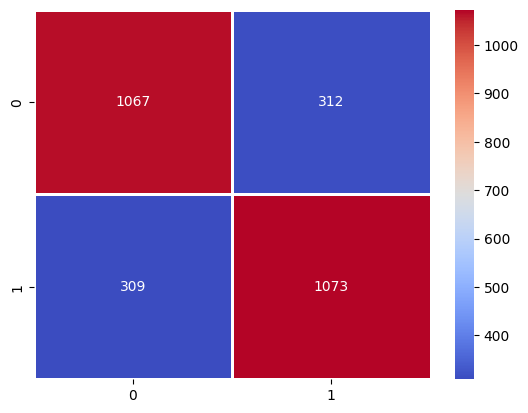

In [95]:
y_pred_gini = classificador_gini.predict(X_test)

taxa_de_acerto = accuracy_score(y_test, y_pred_gini)
print('Taxa de acertos:', taxa_de_acerto)

matriz_de_confusao = confusion_matrix(y_test, y_pred_gini)
print('Matriz de confusão:')
print(matriz_de_confusao)

sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Taxa de acertos: 0.7779789931184353
Matriz de confusão:
[[1049  330]
 [ 283 1099]]


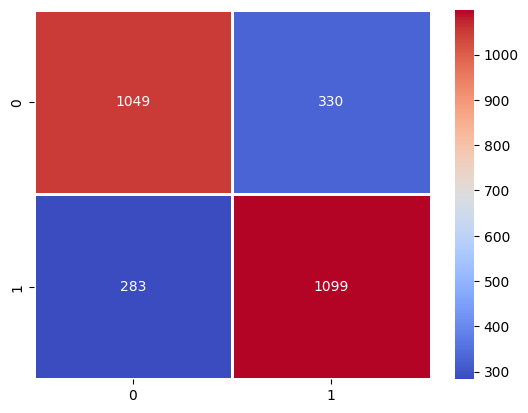

In [96]:
y_pred_entropy = classificador_entropy.predict(X_test)

taxa_de_acerto = accuracy_score(y_test, y_pred_entropy)
print('Taxa de acertos:', taxa_de_acerto)

matriz_de_confusao = confusion_matrix(y_test, y_pred_entropy)
print('Matriz de confusão:')
print(matriz_de_confusao)

sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

In [97]:
rotulos_distintos = list(df_original['Situação Cadastral'].unique())

relatorio = classification_report(y_test, y_pred_gini, target_names= rotulos_distintos)
print(relatorio)

              precision    recall  f1-score   support

       Ativa       0.78      0.77      0.77      1379
   Encerrado       0.77      0.78      0.78      1382

    accuracy                           0.78      2761
   macro avg       0.78      0.78      0.78      2761
weighted avg       0.78      0.78      0.78      2761



In [98]:
relatorio = classification_report(y_test, y_pred_entropy, target_names= rotulos_distintos)
print(relatorio)

              precision    recall  f1-score   support

       Ativa       0.79      0.76      0.77      1379
   Encerrado       0.77      0.80      0.78      1382

    accuracy                           0.78      2761
   macro avg       0.78      0.78      0.78      2761
weighted avg       0.78      0.78      0.78      2761



In [99]:
parametros={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,2,4,6,8,10,12],
    'min_samples_leaf':[1,2,5,10],
    'min_samples_split':[2,5,10],
    'max_features':[None,'sqrt','log2']
}

# ccp_alpha= mostrar a melhor arvore
classificador_tree= tree.DecisionTreeClassifier()

grid=GridSearchCV(estimator=classificador_tree,param_grid=parametros,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [100]:
#Arvore com a melhor classificação do GridSearchCV
classificador_grid_tree = tree.DecisionTreeClassifier(
    criterion=grid.best_params_['criterion'],
    max_depth=grid.best_params_['max_depth'],
    max_features=grid.best_params_['max_features'],
    min_samples_leaf=grid.best_params_['min_samples_leaf'],
    min_samples_split=grid.best_params_['min_samples_split'],
    splitter=grid.best_params_['splitter']
)

#Treinando
classificador_grid_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [101]:
# plt.figure(figsize=(30, 10))
# tree.plot_tree(classificador_grid_tree, feature_names=df_x_ntransformar.columns, class_names=df_x_ntransformar.columns, filled=True)
# plt.title("Árvore de Decisão (Critério: entropy)")
# plt.show()

In [102]:
y_pred_tree = classificador_grid_tree.predict(X_test)

relatorio = classification_report(y_test, y_pred_tree, target_names= rotulos_distintos)
print(relatorio)

              precision    recall  f1-score   support

       Ativa       0.78      0.76      0.77      1379
   Encerrado       0.77      0.79      0.78      1382

    accuracy                           0.78      2761
   macro avg       0.78      0.78      0.78      2761
weighted avg       0.78      0.78      0.78      2761



In [103]:
path = classificador_grid_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alpha = path['ccp_alphas']
impurities = path['impurities']

print(ccp_alpha)
print(impurities)


[0.         0.00016097 0.00016097 0.00016097 0.00016097 0.00016097
 0.00016097 0.00016097 0.0001663  0.0001663  0.0001663  0.0001663
 0.0001663  0.0001663  0.0001663  0.0001663  0.0001663  0.0001663
 0.0001663  0.0001663  0.0001663  0.0001663  0.0001663  0.00017485
 0.00018109 0.00018109 0.00018109 0.00018227 0.00018227 0.00018227
 0.00018236 0.00019537 0.00019537 0.00019537 0.00019589 0.00019589
 0.00019589 0.00019589 0.00019589 0.00019589 0.00019589 0.00019589
 0.00019589 0.00019589 0.00019589 0.00019589 0.00019589 0.00020759
 0.00020759 0.00020816 0.00021789 0.00021789 0.00021789 0.00021789
 0.00021789 0.00021789 0.00021789 0.00021789 0.00021789 0.00021789
 0.00021789 0.00021789 0.00021789 0.00021911 0.00022173 0.00022582
 0.0002271  0.00022836 0.0002294  0.0002294  0.0002294  0.00023046
 0.00023046 0.00023362 0.00023543 0.00023543 0.00023543 0.00023543
 0.00023543 0.00023543 0.00023543 0.00023543 0.00023543 0.00023543
 0.00023543 0.00023543 0.00023543 0.00023543 0.00024146 0.000241

In [104]:
ccp_alpha = ccp_alpha[:-1]  # Exclui o último valor, que é 0

classificador_prune = []

# Cria e treina um classificador para cada valor de ccp_alpha
for i in ccp_alpha:
    classificador_ccp_tree = tree.DecisionTreeClassifier(ccp_alpha=i)
    classificador_ccp_tree.fit(X_train, y_train)

    # Adiciona o classificador treinado à lista
    classificador_prune.append(classificador_ccp_tree)

# Calcula a acurácia para cada classificador na lista
acuracia_treino = [
    clf.score(X_train, y_train)  # Usa clf em vez de classificador_prune
    for clf in classificador_prune
]

acuracia_teste = [
    clf.score(X_test, y_test)  # Usa clf em vez de classificador_prune
    for clf in classificador_prune
]

print("Acurácia no treinamento:", acuracia_treino)
print("Acurácia no teste:", acuracia_teste)

alpha=classificador_prune[acuracia_teste.index(max(acuracia_teste))]

Acurácia no treinamento: [1.0, 0.9361342508752867, 0.9345647712181576, 0.9351684172401303, 0.9360135216708921, 0.9352891464445249, 0.9346855004225522, 0.9354098756489194, 0.9334782083786067, 0.9338403959917904, 0.9334782083786067, 0.9335989375830013, 0.9329952915610286, 0.9335989375830013, 0.9329952915610286, 0.9326331039478449, 0.934202583604974, 0.9327538331522395, 0.9335989375830013, 0.9338403959917904, 0.9335989375830013, 0.9338403959917904, 0.9332367499698176, 0.9284075817940359, 0.9193528914644452, 0.9200772666908125, 0.918869974646867, 0.9192321622600507, 0.9205601835083906, 0.9195943498732343, 0.918628516238078, 0.9070385126162018, 0.9071592418205964, 0.9070385126162018, 0.9058312205722564, 0.9072799710249909, 0.9070385126162018, 0.9067970542074127, 0.9070385126162018, 0.9071592418205964, 0.9070385126162018, 0.9071592418205964, 0.9081250754557527, 0.9064348665942291, 0.9064348665942291, 0.9064348665942291, 0.9065555957986237, 0.8978630930822166, 0.8995533019437402, 0.8984667391

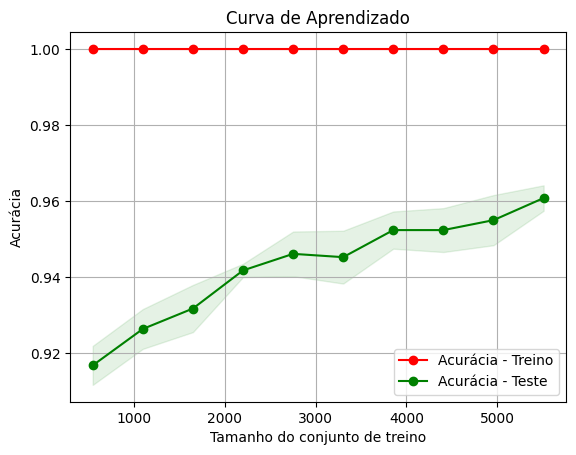

In [105]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(atributo_pre, df_y, test_size=0.3, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(classificador_grid_tree, X_train, y_train, cv=5, 
                                                        scoring='accuracy', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculando as médias e desvios padrões
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Acurácia")

# Área sombreada para desvios padrões
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Curvas de treino e teste
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia - Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia - Teste")

plt.legend(loc="best")
plt.grid()
plt.show()


In [106]:
# path = classificador_grid_tree.cost_complexity_pruning_path(X_train, y_train)
# ccp_alpha = path['ccp_alphas']
# ccp_alpha = ccp_alpha[1:]  # Remove o primeiro valor


# classificador_prune = []

# # Cria e treina um classificador para cada valor de ccp_alpha
# for i in ccp_alpha:
#     classificador_ccp_tree = tree.DecisionTreeClassifier(ccp_alpha=i)
#     classificador_ccp_tree.fit(X_train, y_train)
#     classificador_prune.append(classificador_ccp_tree)

# # Calcula a acurácia para cada classificador na lista
# acuracia_treino = [
#     clf.score(X_train, y_train) for clf in classificador_prune
# ]

# acuracia_teste = [
#     clf.score(X_test, y_test) for clf in classificador_prune
# ]

# print("Acurácia no treinamento:", acuracia_treino)
# print("Acurácia no teste:", acuracia_teste)

# # Seleciona o classificador com a melhor acurácia no teste
# melhor_classificador = classificador_prune[acuracia_teste.index(max(acuracia_teste))]

# # Define a função para criar e treinar a árvore de decisão
# def arvore(X_train, y_train, alpha):
#     classificador = tree.DecisionTreeClassifier(ccp_alpha=alpha, criterion='gini')
#     classificador.fit(X_train, y_train)
#     return classificador

# # Cria o classificador com o melhor alpha
# classificador = arvore(X_train, y_train, melhor_classificador.ccp_alpha)

# plt.figure(figsize=(30, 10))
# tree.plot_tree(classificador, feature_names=df_x_ntransformar.columns, class_names=df_x_ntransformar.columns, filled=True)
# plt.title("Árvore de Decisão (Critério: entropy)")
# plt.show()

In [107]:
# y_pred_ccp = classificador_grid_tree.predict(X_test)

# taxa_de_acerto = accuracy_score(y_test, y_pred_ccp)
# print('Taxa de acertos:', taxa_de_acerto)

# matriz_de_confusao = confusion_matrix(y_test, y_pred_ccp)
# print('Matriz de confusão:')
# print(matriz_de_confusao)

# sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
# plt.show()

# relatorio = classification_report(y_test, y_pred_ccp, target_names= rotulos_distintos)
# print(relatorio)

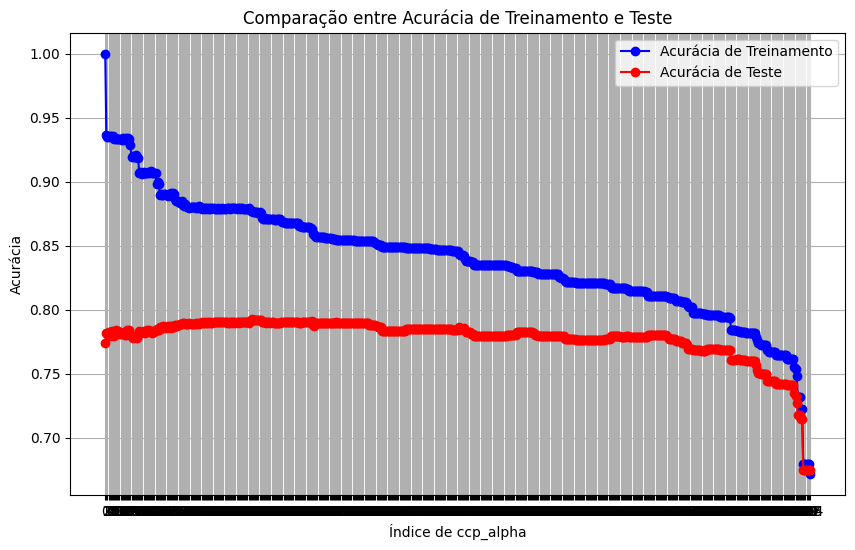

In [108]:
ccp_alpha_values = np.arange(len(acuracia_treino))  # Usando a quantidade de classificadores

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ccp_alpha_values, acuracia_treino, marker='o', label='Acurácia de Treinamento', color='blue')
plt.plot(ccp_alpha_values, acuracia_teste, marker='o', label='Acurácia de Teste', color='red')

# Adicionando detalhes ao gráfico
plt.title("Comparação entre Acurácia de Treinamento e Teste")
plt.xlabel("Índice de ccp_alpha")
plt.ylabel("Acurácia")
plt.xticks(ccp_alpha_values)  # Para mostrar todos os índices de ccp_alpha
plt.grid()
plt.legend()
plt.show()


In [109]:
indice_melhor_acuracia = acuracia_teste.index(max(acuracia_teste))

melhor_ccp_alpha = ccp_alpha[indice_melhor_acuracia]

print("Melhor ccp_alpha:", melhor_ccp_alpha)


Melhor ccp_alpha: 0.00024537797695706014


In [110]:
#Arvore com a melhor classificação do GridSearchCV
classificador_grid_tree = tree.DecisionTreeClassifier(
    criterion=grid.best_params_['criterion'],
    max_depth=grid.best_params_['max_depth'],
    max_features=grid.best_params_['max_features'],
    min_samples_leaf=grid.best_params_['min_samples_leaf'],
    min_samples_split=grid.best_params_['min_samples_split'],
    splitter=grid.best_params_['splitter'],
    ccp_alpha=melhor_ccp_alpha
)

#Treinando
classificador_grid_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00024537797695706014, criterion='entropy')

In [111]:
# plt.figure(figsize=(30, 10))
# tree.plot_tree(classificador_grid_tree, feature_names=df_x_ntransformar.columns, class_names=df_x_ntransformar.columns, filled=True)
# plt.title("Árvore de Decisão (Critério: entropy)")
# plt.show()

Taxa de acertos: 0.9664634146341463
Matriz de confusão:
[[2165   46]
 [  53  688]]


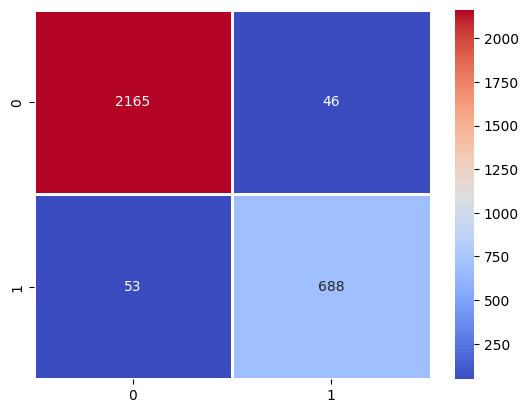

              precision    recall  f1-score   support

       Ativa       0.98      0.98      0.98      2211
   Encerrado       0.94      0.93      0.93       741

    accuracy                           0.97      2952
   macro avg       0.96      0.95      0.96      2952
weighted avg       0.97      0.97      0.97      2952



In [112]:
y_pred_ccp = classificador_grid_tree.predict(X_test)

taxa_de_acerto = accuracy_score(y_test, y_pred_ccp)
print('Taxa de acertos:', taxa_de_acerto)

matriz_de_confusao = confusion_matrix(y_test, y_pred_ccp)
print('Matriz de confusão:')
print(matriz_de_confusao)

sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

relatorio = classification_report(y_test, y_pred_ccp, target_names= rotulos_distintos)
print(relatorio)

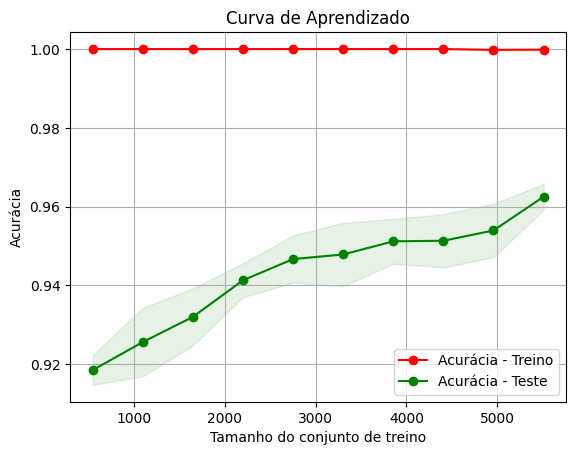

In [113]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(atributo_pre, df_y, test_size=0.3, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(classificador_grid_tree, X_train, y_train, cv=5, 
                                                        scoring='accuracy', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculando as médias e desvios padrões
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Acurácia")

# Área sombreada para desvios padrões
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Curvas de treino e teste
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia - Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia - Teste")

plt.legend(loc="best")
plt.grid()
plt.show()


In [114]:
teste = pd.DataFrame([{
    "Estado": 'SAO PAULO',
    "Município": 'SAO PAULO',
    "Ano": 2024,
    "Tipo de Resíduo": 'Resíduo inflamável',
    "Método de Reciclagem": 'Queima em formos industriais',
    "Quantidade": 1000,
    "Unidade de Medida": 'kilogramas',
}])
display(teste)

,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida
0,SAO PAULO,SAO PAULO,2024,Resíduo inflamável,Queima em formos industriais,1000,kilogramas


In [115]:
pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('model', classificador_grid_tree)
])

# Salvar o pipeline em um arquivo
with open('pipeline.pkl', 'wb') as arquivo:
    joblib.dump(pipeline, arquivo)

# Carregando o pipeline
with open('pipeline.pkl', 'rb') as arquivo:
    pipeline_carregado = joblib.load(arquivo)

# Fazer previsões diretamente com os dados de teste
predicoes = pipeline_carregado.predict(teste)

# Exibir as previsões
print("Previsões:", predicoes)

Previsões: ['Ativa']


c:\Users\henriquelucareli-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
